In [418]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import json, ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Uploading and Wranggling the Data

In [545]:
# Upload into a Dataframe
df = pd.read_csv('Food-&-Beverage-stores.csv')
df

,observation_date,MSRSAK445,MSRSAL445,MSRSAR445,MSRSAZ445,MSRSCA445,MSRSCO445,MSRSCT445,MSRSDE445,MSRSFL445,...,MSRSSD445,MSRSTN445,MSRSTX445,MSRSUT445,MSRSVA445,MSRSVT445,MSRSWA445,MSRSWI445,MSRSWV445,MSRSWY445
0,2019-01-01,3.9,2.9,5.4,4.0,4.5,4.0,4.4,3.7,4.4,...,7.0,4.8,8.1,1.8,4.2,4.3,4.1,2.7,3.5,5.9
1,2019-02-01,-1.1,0.2,-12.3,0.4,0.5,1.7,2.2,0.7,2.3,...,2.3,1.2,2.9,10.2,1.2,0.6,2.3,0.2,-2.8,2.3
2,2019-03-01,-1.6,0.8,-13.1,0.4,-0.6,1.0,-3.8,-0.9,-0.2,...,0.7,0.6,2.5,11.1,2.6,-2.3,-0.6,0.9,-0.4,2.0
3,2019-04-01,2.0,4.1,4.0,5.4,5.2,4.1,2.2,6.7,4.9,...,3.8,5.5,6.8,13.9,5.2,3.4,3.6,5.3,4.3,3.7
4,2019-05-01,1.3,4.6,3.0,2.7,1.7,3.2,0.3,3.7,4.1,...,4.4,5.7,5.0,12.5,4.6,1.1,2.2,3.9,5.1,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2024-09-01,-1.1,0.0,-2.9,-0.7,0.1,0.3,1.6,-1.1,4.0,...,-2.6,-0.1,1.2,-1.8,-0.4,2.0,2.9,-0.2,-1.3,0.0
69,2024-10-01,-3.8,7.1,2.5,2.9,4.6,4.4,4.3,3.1,9.4,...,-2.8,4.9,5.0,2.3,3.6,5.6,3.1,1.1,2.9,3.0
70,2024-11-01,-3.0,4.8,4.8,1.2,6.4,5.6,5.2,-0.5,5.1,...,4.1,2.5,4.3,1.5,2.7,3.3,4.3,-1.2,0.9,4.5
71,2024-12-01,-5.9,4.7,-1.1,0.1,1.8,1.6,1.9,1.4,5.0,...,-0.4,1.8,2.0,0.0,1.5,-2.0,1.9,0.1,0.0,0.9


In [539]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 51 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   observation_date  73 non-null     object 
 1   MSRSAK445         73 non-null     float64
 2   MSRSAL445         73 non-null     float64
 3   MSRSAR445         73 non-null     float64
 4   MSRSAZ445         73 non-null     float64
 5   MSRSCA445         73 non-null     float64
 6   MSRSCO445         73 non-null     float64
 7   MSRSCT445         73 non-null     float64
 8   MSRSDE445         73 non-null     float64
 9   MSRSFL445         73 non-null     float64
 10  MSRSGA445         73 non-null     float64
 11  MSRSHI445         73 non-null     float64
 12  MSRSIA445         73 non-null     float64
 13  MSRSID445         73 non-null     float64
 14  MSRSIL445         73 non-null     float64
 15  MSRSIN445         73 non-null     float64
 16  MSRSKS445         73 non-null     float64
 17 

In [546]:
# Renaming each column to the state abbreviation

for column in df.columns[1:]:
    # Make sure it hasn't been renamed already
    if 'MSRS' not in column: 
        break
    df = df.rename(columns = {column: column[4:6]})
    
df.columns

Index(['observation_date', 'AK', 'AL', 'AR', 'AZ', 'CA', 'CO', 'CT', 'DE',
       'FL', 'GA', 'HI', 'IA', 'ID', 'IL', 'IN', 'KS', 'KY', 'LA', 'MA', 'MD',
       'ME', 'MI', 'MN', 'MO', 'MS', 'MT', 'NC', 'ND', 'NE', 'NH', 'NJ', 'NM',
       'NV', 'NY', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VA', 'VT', 'WA', 'WI', 'WV', 'WY'],
      dtype='object')

In [547]:
# Make sure the date is datetime format

df['observation_date'] = pd.to_datetime(
    df['observation_date'],
    format = '%Y-%m-%d'
)
df

,observation_date,AK,AL,AR,AZ,CA,CO,CT,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
0,2019-01-01,3.9,2.9,5.4,4.0,4.5,4.0,4.4,3.7,4.4,...,7.0,4.8,8.1,1.8,4.2,4.3,4.1,2.7,3.5,5.9
1,2019-02-01,-1.1,0.2,-12.3,0.4,0.5,1.7,2.2,0.7,2.3,...,2.3,1.2,2.9,10.2,1.2,0.6,2.3,0.2,-2.8,2.3
2,2019-03-01,-1.6,0.8,-13.1,0.4,-0.6,1.0,-3.8,-0.9,-0.2,...,0.7,0.6,2.5,11.1,2.6,-2.3,-0.6,0.9,-0.4,2.0
3,2019-04-01,2.0,4.1,4.0,5.4,5.2,4.1,2.2,6.7,4.9,...,3.8,5.5,6.8,13.9,5.2,3.4,3.6,5.3,4.3,3.7
4,2019-05-01,1.3,4.6,3.0,2.7,1.7,3.2,0.3,3.7,4.1,...,4.4,5.7,5.0,12.5,4.6,1.1,2.2,3.9,5.1,2.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,2024-09-01,-1.1,0.0,-2.9,-0.7,0.1,0.3,1.6,-1.1,4.0,...,-2.6,-0.1,1.2,-1.8,-0.4,2.0,2.9,-0.2,-1.3,0.0
69,2024-10-01,-3.8,7.1,2.5,2.9,4.6,4.4,4.3,3.1,9.4,...,-2.8,4.9,5.0,2.3,3.6,5.6,3.1,1.1,2.9,3.0
70,2024-11-01,-3.0,4.8,4.8,1.2,6.4,5.6,5.2,-0.5,5.1,...,4.1,2.5,4.3,1.5,2.7,3.3,4.3,-1.2,0.9,4.5
71,2024-12-01,-5.9,4.7,-1.1,0.1,1.8,1.6,1.9,1.4,5.0,...,-0.4,1.8,2.0,0.0,1.5,-2.0,1.9,0.1,0.0,0.9


# Questions

1. **How did the food and beverage stores perform in different states during covid lockdown?**
    - Compare with states that didn't issue orders of lockdown
2. **How fast did the states recover from covid and which states recovered the most compared to 2019?**
3. **Is there a pattern recognition of higher sales during holidays compared to no holidays?**
4. **which state forecasts the most % increase of sales in the next 6 months of the available data?** 

---------

# 1. (a) Stores performance during different covid periods 

**Based on this link, the recession of Covid in the US started in Feb and ended in April. We will be using this period of time to analyze the performance** 

**However, I will use the full year of 2020 to elimnate seasonal bais and compare it with 2019 and 2021**

*"began in February 2020 and ended roughly two months later, in April 2020"*

https://en.wikipedia.org/wiki/COVID-19_recession#:~:text=The%20National%20Bureau%20of%20Economic,on%20records%20dating%20to%201854.

In [556]:
# label each year relative to covid
def label_covid_period(date):
    
    y = date.year
    if y >= 2019 and y < 2020:
        return 'pre covid'
    
    elif y >= 2020 and y < 2021:
        return 'covid'
    
    elif y ==2021:
        return 'post covid'

# Apply the function to the dataframe in a new column
df['covid_period'] = df['observation_date'].apply(label_covid_period)

df[df['covid_period'] == 'covid']



,observation_date,AK,AL,AR,AZ,CA,CO,CT,DE,FL,...,TN,TX,UT,VA,VT,WA,WI,WV,WY,covid_period
12,2020-01-01,3.4,-2.5,2.3,-0.1,1.5,2.5,-0.1,-3.2,2.2,...,1.0,1.8,11.7,4.0,19.5,8.6,-0.3,-1.4,9.4,covid
13,2020-02-01,10.5,5.9,8.9,5.8,5.6,7.8,5.6,5.4,7.9,...,9.6,8.9,7.7,12.0,27.6,11.1,7.6,7.1,20.6,covid
14,2020-03-01,26.2,21.0,29.4,25.5,25.6,26.6,27.4,23.0,27.5,...,29.7,21.2,24.6,29.6,54.7,34.7,24.6,23.2,35.3,covid
15,2020-04-01,19.9,15.6,19.5,8.3,11.9,12.0,19.9,8.6,15.3,...,16.7,8.4,9.1,20.5,NaN,19.2,9.5,9.0,26.4,covid
16,2020-05-01,23.2,14.3,20.5,11.7,17.8,14.5,17.4,6.5,18.0,...,17.3,10.9,6.3,14.3,27.4,20.7,5.9,4.6,29.5,covid
17,2020-06-01,17.5,1.9,12.7,8.5,13.3,12.0,14.8,2.7,15.3,...,0.8,11.3,1.7,7.9,-1.5,16.4,2.5,-6.0,25.5,covid
18,2020-07-01,18.6,11.5,18.0,8.2,12.7,11.2,12.4,6.1,17.9,...,14.8,10.3,4.2,14.4,-3.1,18.9,7.0,5.9,20.7,covid
19,2020-08-01,13.3,3.0,9.3,3.7,8.0,7.0,11.5,1.0,6.6,...,6.9,5.6,1.0,9.5,-5.8,15.1,1.5,-0.6,17.2,covid
20,2020-09-01,15.4,-2.4,10.3,8.4,15.5,11.3,19.8,2.3,16.7,...,-5.7,8.8,1.6,6.1,19.5,18.0,3.2,-7.2,23.0,covid
21,2020-10-01,13.4,-3.3,10.7,7.1,13.3,11.3,21.0,2.2,15.0,...,-5.3,9.0,2.0,7.5,23.9,18.4,3.6,-7.9,18.4,covid


In [ ]:
# find the mean of percentage change of every state at different covid periods

avg_percent_by_period = df.groupby('covid_period').mean().drop(columns = 'observation_date')
avg_percent_by_period

,AK,AL,AR,AZ,CA,CO,CT,DE,FL,GA,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
covid_period,,,,,,,,,,,,,,,,,,,,,
covid,15.750,6.791667,13.866667,8.116667,11.841667,11.333333,14.225000,5.916667,13.758333,5.625000,...,15.116667,9.291667,9.216667,7.000000,12.266667,13.845455,17.733333,6.700000,2.875,21.225000
post covid,-7.675,12.100000,3.375000,10.375000,8.316667,9.191667,3.458333,9.475000,5.833333,7.883333,...,6.133333,7.991667,11.033333,7.858333,-8.041667,-22.260000,8.191667,8.666667,8.250,2.283333
pre covid,2.325,5.066667,1.633333,3.125000,2.141667,3.308333,0.691667,2.600000,3.108333,3.758333,...,4.541667,5.675000,5.058333,11.508333,3.983333,10.566667,2.466667,3.316667,3.850,5.075000


In [ ]:
# the total average of the US sale percentage change

total_avg_percent_by_period = avg_percent_by_period.mean(axis = 1)
df_total_avg_percent_by_period = pd.DataFrame({'covid_period':total_avg_percent_by_period.index, 'sale_percent_change': total_avg_percent_by_period.values})
df_total_avg_percent_by_period

,covid_period,sale_percent_change
0,covid,10.066798
1,post covid,4.902177
2,pre covid,3.863788


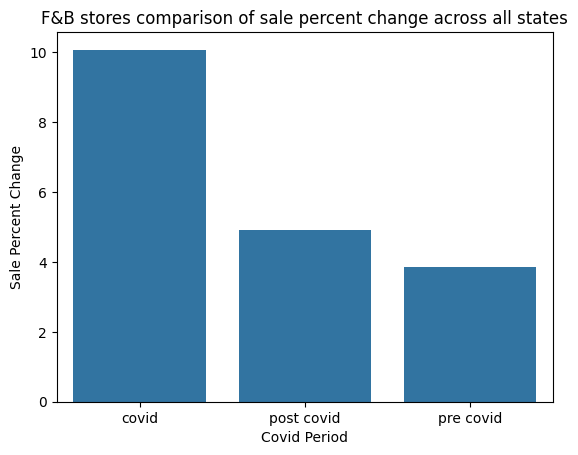

In [ ]:
# Creating a bar plot of the different covid periods

sns.barplot(x = 'covid_period', y = 'sale_percent_change', data = df_total_avg_percent_by_period)
plt.title('F&B stores comparison of sale percent change across all states')
plt.xlabel('Covid Period')
plt.ylabel('Sale Percent Change')
plt.show()

**Interpretation:**
- F&B stores had an increase of 10% of their sales in covid over 2019 (pre covid)
- The percent change in 2021 (4.9%) decreased to half the amount of the increase in 2020, but sales kept growing at a 4.9% during 2021
- This indicats several insights: 
    - Covid supported the F&B industry across the US
    - People were eating and ordering more during covid (probably due to depression)
    - A second more plausable reason is the spread of fear across the US, so people bought lots of food and beverages during covid
- The second reason of increase sales due to fear is supported by the sharp decrease of sales rate in 2021; people felt more secure

# 1. (b) Stores performance at different states during covid lockdown 

In [656]:
# Preprocessing the data to find the highest and lowest percentage sale change
# covid only dataframe with year column 
df_covid = df.loc[df['covid_period'] == 'covid'].copy()
df_covid['year'] = df_covid['observation_date'].dt.year

# group the mean of all states during covid - 2020
# list of all states
state_col = [c for c in df_covid.columns if c not in ('observation_date','covid_period','year')]
covid_avg_per_state = df_covid.groupby('year')[state_col].mean().T.reset_index().rename(columns={'index':'state'})
covid_avg_per_state.head()

year,state,2020
0,AK,15.750000
1,AL,6.791667
2,AR,13.866667
3,AZ,8.116667
4,CA,11.841667


In [649]:
# The state with the most percentage increase during covid

highest_state = covid_avg_per_state.loc[covid_avg_per_state[2020].idxmax()]['state']

print(f"The state that had the biggest average %-increase in 2020 is {highest_state}")
print(f"%-increase of {covid_avg_per_state.loc[covid_avg_per_state[2020].idxmax()][2020]}")

The state that had the biggest average %-increase in 2020 is WY
%-increase of 21.224999999999998


In [647]:
# Finding the state with the least increase of sale percentage during covid

least_increase_state = covid_avg_per_state.loc[covid_avg_per_state[2020].idxmin()]['state']

print(f"The state that had the least average %-increase in 2020 is {least_increase_state}")
print(f"%-increase of {covid_avg_per_state.loc[covid_avg_per_state[2020].idxmin()][2020]}")

The state that had the least average %-increase in 2020 is HI
%-increase of 0.23333333333333325


**Visualization**

In [ ]:
# Preprocessing the data for a graph

# Create a single row with the avg of each state
covid_avg_heatmap =  df_covid.groupby('year')[state_col].mean().T

# Sort the percentages by decending order
covid_avg_heatmap = covid_avg_heatmap.sort_values(by = 2020, ascending=False)

# Separate the data of the highest and lowest states
highest_10 = covid_avg_heatmap.head(5)
lowest_10 = covid_avg_heatmap.tail(5)

# get a dataframe of the lowest and highest states for a better graph
lowest_and_highest_states = pd.concat([highest_10, lowest_10])


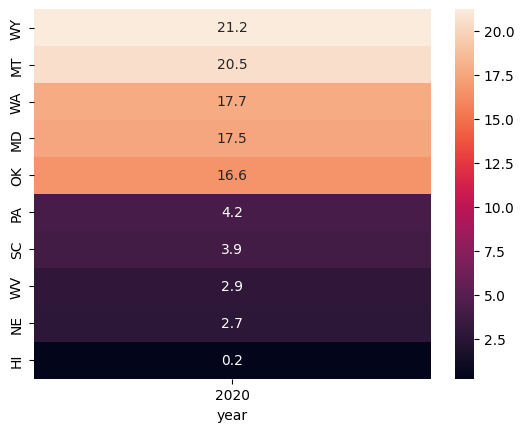

In [ ]:
# Create the heatmap

sns.heatmap(lowest_and_highest_states,annot=True, fmt=".1f")
plt.show()

**highest percent change increase: Wyoming, Montana, Washington, Maryland, Oklahoma**

**lowest percent change increase: Hawaii, Nebraska, West Viginia, South Carolina, Pennsylvania**

**Does this correlate with Covid Policy of each individual state? Did the Covid policies for each state have a direct impact on the F&B percent change?**

*To answer the question, I will get data on the alcohol, face masks and stay at home policies.*


*Uploading the data*